<a href="https://colab.research.google.com/github/Ambrish001/Explainable-AI/blob/main/SHAP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.3 MB/s 


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import shap
import numpy
import cv2
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load pre-trained model and choose two images to explain
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()
print(X[0].shape)
print(y[0])
args = {"a":"/content/drive/MyDrive/ANN_Researh/esk_to_sib1.jpg",'b':'/content/drive/MyDrive/ANN_Researh/eski_to_mala1.jpg','c':'/content/drive/MyDrive/ANN_Researh/mala_to_esk1.jpg','d':'/content/drive/MyDrive/ANN_Researh/mala_to_sib1.jpg','e':'/content/drive/MyDrive/ANN_Researh/sib_to_esk1.jpg','f':'/content/drive/MyDrive/ANN_Researh/sib_to_mala1.jpg'}
i = cv2.imread(args['a'])
print(i.shape)

(224, 224, 3)
6381.0
(224, 224, 3)


In [ ]:
# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [ ]:
def preprocess_img(img):

  # Convert to RGB color channels, resize the image and add batch dimension

  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(224,224))
  img = numpy.expand_dims(img,axis=0)

  return img

  0%|          | 0/148 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 1/6 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 3/6 [01:26<01:08, 22.81s/it]

  0%|          | 0/148 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 4/6 [02:09<01:02, 31.37s/it]

  0%|          | 0/148 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 5/6 [02:54<00:36, 36.16s/it]

  0%|          | 0/148 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 6/6 [03:37<00:00, 38.60s/it]

  0%|          | 0/148 [00:00<?, ?it/s]

Partition explainer: 7it [04:24, 44.03s/it]


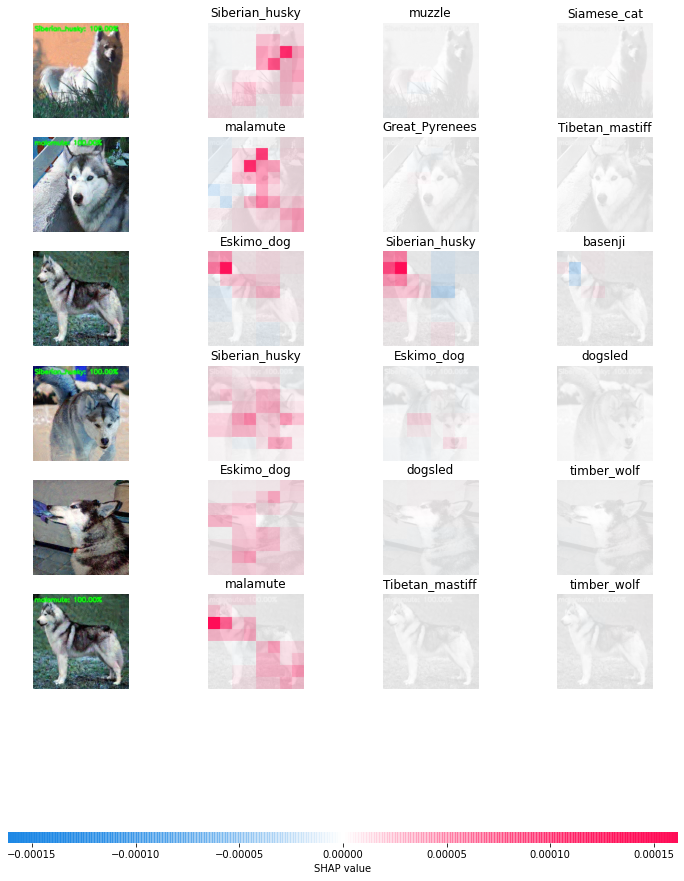

In [ ]:
mod = ResNet50(weights='imagenet')
imga = cv2.imread(args['a'])
imgb = cv2.imread(args['b'])
imgc = cv2.imread(args['c'])
imgd = cv2.imread(args['d'])
imge = cv2.imread(args['e'])
imgf = cv2.imread(args['f'])

comb = numpy.stack((imga,imgb,imgc,imgd,imge,imgf))
comb = comb.astype(float)

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background

#'''
masker = shap.maskers.Image("inpaint_telea", imga.shape)

# By default the Partition explainer is used for all  partition explainer
e = shap.Explainer(mod, masker ,output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = e(comb[:], max_evals=300, batch_size=50, outputs=shap.Explanation.argsort.flip[:3])
# shap_values 1 explainer.shap_values(img)

shap.image_plot(shap_values)
#'''